# Public Safety Census Data in Allegheny County 
### Bella DeRubeis

---

# Introduction
This project aims to find the safest neighborhood in Pittsburgh for dog owners. Safety is key for walking dogs and enjoying outdoor time without worries. We used the Public Safety 2010 dataset to analyze crime rates in each neighborhood. This dataset includes major and minor crime reports, which help us understand the overall safety of different neighborhoods.

---

# The Metric

To measure safety, I used crime data from the Public Safety 2010 dataset. The metric is based on the crime rate per 100 people, which combines reports of major and minor crimes. The neighborhoods with the lowest crime rates were considered the safest.

In [18]:
import pandas as pd

file_path = 'safety_data.csv'
df = pd.read_csv(file_path)

df['#Part 1 (Major Crime) Reports (2010)'] = pd.to_numeric(df['#Part 1 (Major Crime) Reports (2010)'], errors='coerce')
df['#Part 2 Reports (2010)'] = pd.to_numeric(df['#Part 2 Reports (2010)'], errors='coerce')
df['Population (2010)'] = pd.to_numeric(df['Population (2010)'], errors='coerce')

df['Total Crime'] = df['#Part 1 (Major Crime) Reports (2010)'] + df['#Part 2 Reports (2010)']
df['Crime Rate per 100 People'] = (df['Total Crime'] / df['Population (2010)']) * 100

df_filtered = df[df['Neighborhood'].notna()]
safe_neighborhoods = df_filtered[['Neighborhood', 'Crime Rate per 100 People']].sort_values(by='Crime Rate per 100 People')

print("Top 5 Safest Neighborhoods in Pittsburgh:\n", safe_neighborhoods.head(5))

Top 5 Safest Neighborhoods in Pittsburgh:
      Neighborhood  Crime Rate per 100 People
54  New Homestead                   1.111111
26  East Carnegie                   3.508772
65  Regent Square                   5.603448
66      Ridgemont                   6.004141
35     Glen Hazel                   6.005587


---

# The Best Neighborhood
The analysis shows that New Homestead is the safest neighborhood in Pittsburgh, with the lowest crime rate. This neighborhood is largely residential with fewer commercial areas, which could contribute to its lower crime rate. It is a quiet area, making it a good choice for dog owners. 

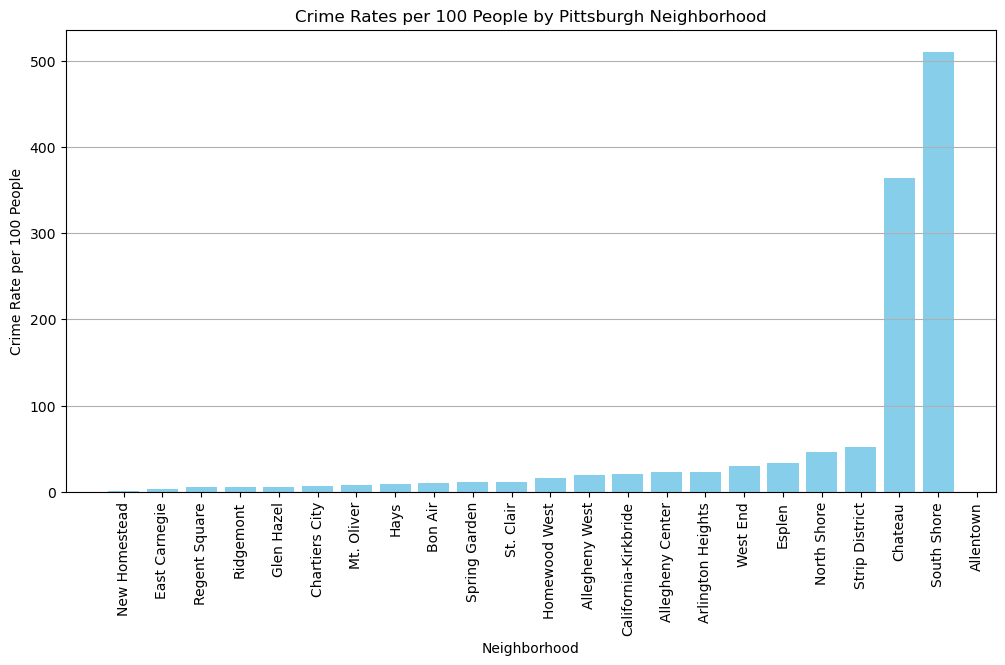

In [20]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.bar(safe_neighborhoods['Neighborhood'], safe_neighborhoods['Crime Rate per 100 People'], color='skyblue')

plt.xticks(rotation=90)
plt.title('Crime Rates per 100 People by Pittsburgh Neighborhood')
plt.xlabel('Neighborhood')
plt.ylabel('Crime Rate per 100 People')
plt.grid(axis='y')  
plt.show()

---

# Conclusion
New Homestead is the safest neighborhood in Pittsburgh, with the lowest crime rate. This makes it a good choice for dog owners who value a secure environment for walks and outdoor activities. However, since the data is from 2010, recent changes in neighborhood safety might not be reflected.

I chose safety as my sub-metric because it plays a major role in the quality of life for both dogs and their owners. A safer neighborhood allows for more enjoyable and worry-free outdoor time. In future analyses, it would be useful to include more recent crime data for a better understanding of current safety trends.